# Aiffel_3rd_Project
<br>  
<br>  

## ⛓️딥러닝 프로젝트⛓️

<br>  

#### 목차
**1. Boston 주택 가격 예측 모델 만들기**     
**2. Reuters 딥러닝 모델 만들기**    
**3. CIFAR10 딥러닝 모델 만들기**    
<br>  
<br>  


# 🔶Boston 주택 가격 예측 모델 만들기  

<br>  
<br>  

<br>

## 데이터 로드 및 전처리

|feature|설명|
|--|--|
|CRIM|자치시별 1인당 범죄율|
|ZN|25,000 평방피트를 초과하는 거주지역의 비율|
|INDUS|비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|10ppm 당 농축 일산화질소|
|RM|주택 1 가구당 평균 방의 개수|
|AGE|1940년 이전에 건축된 소유주택의 비율|
|DIS|5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|방사형 도로까지의 접근성 지수|
|TAX|10,000 달러당 재산세율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함|
|LSTAT|모집단의 하위계층의 비율(%)|
|MEDV|본인 소유의 주택가격(중앙값)(단위: $1,000)|

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [5]:
# 데이터 표준화 (전처리)
# 먼저 입력 데이터의 각 특성의 평균을 빼준다.
train_data_mean = train_data.mean(axis=0)
train_data -= train_data_mean


# 평균을 뺀 입력 데이터에서 표준편차를 나누기.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data_std = train_data.std(axis=0)
train_data /= train_data_std


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나누기.
test_data -= train_data_mean
test_data /= train_data_std

In [6]:
# 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape= (train_data.shape[1],)))# input_shape은 (train_data.shape[1], )으로 구성
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics='mae') # 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

In [7]:
# 모델 학습

history = model.fit(train_data, train_labels, epochs=100, batch_size=20,validation_data=(test_data, test_labels))

Epoch 1/100
21/21 [==============================] - 2s 9ms/step - loss: 490.3440 - mae: 20.1113 - val_loss: 434.1329 - val_mae: 18.5431
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 338.8308 - mae: 15.9130 - val_loss: 281.7923 - val_mae: 14.6042
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 193.9193 - mae: 11.4965 - val_loss: 145.1878 - val_mae: 10.1794
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 93.3520 - mae: 7.5749 - val_loss: 74.6434 - val_mae: 7.0440
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 51.8776 - mae: 5.4051 - val_loss: 47.9151 - val_mae: 5.4043
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 34.1293 - mae: 4.2350 - val_loss: 35.5855 - val_mae: 4.6183
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 25.4645 - mae: 3.5121 - val_loss: 28.2050 - val_mae: 4.0769
Epoch 8/100
21/21 [==============================] - 0s 3

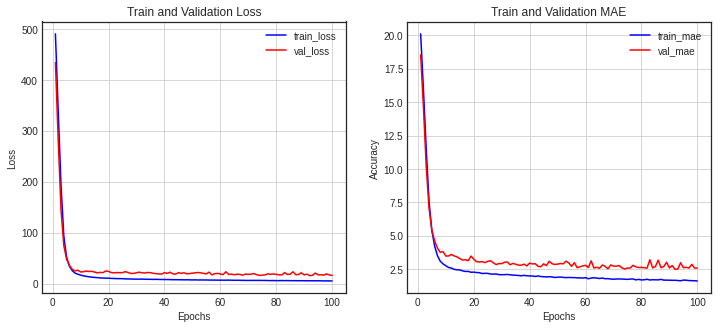

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트화.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [9]:
# 테스트 데이터셋으로 모델 평가하기
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 16.0071 - mae: 2.5851


[16.007144927978516, 2.5850913524627686]

<br>  

**loss는 16.0071, mae는 2.5851이 나오는 것을 확인 할 수 있다.**

<br>  

---
<br>  
<br>  
<br>  

## 🔶Reuters 딥러닝 모델
<br> 
<br>  

## 데이터 로드 및 전처리

- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리.   
    데이터셋은 `keras.datasets`에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한(num_words=10000).  
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 `train_test_split` 함수를 활용.  
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력.  

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [11]:
# reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, val_data, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 확인.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
2246
46


In [12]:
# 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환.
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(train_labels, num_classes=46)
y_val_one_hot = to_categorical(y_val, num_classes=46) 
y_test_one_hot = to_categorical(test_labels, num_classes=46)

## 모델 구성 및 컴파일

- *BatchNormalization*과 *Dropout*을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성한다.

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

<br>  
<br>  

--- 
<br>  

## 모델 학습

- *ModelCheckpoint* 와 *EarlyStopping* 콜백 함수를 적용하여 모델 학습을 진행.  




In [17]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# EarlyStopping: 검증 손실이 더 이상 감소하지 않으면 학습을 중지하는 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train,
    y_train_one_hot,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val_one_hot),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
18/18 [==============================] - 2s 39ms/step - loss: 3.4182 - accuracy: 0.2689 - val_loss: 3.4653 - val_accuracy: 0.5744
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 2.1670 - accuracy: 0.5579 - val_loss: 2.9823 - val_accuracy: 0.7155
Epoch 3/20
18/18 [==============================] - 0s 15ms/step - loss: 1.6611 - accuracy: 0.6617 - val_loss: 2.5762 - val_accuracy: 0.7538
Epoch 4/20
18/18 [==============================] - 0s 15ms/step - loss: 1.3918 - accuracy: 0.7099 - val_loss: 2.2373 - val_accuracy: 0.7881
Epoch 5/20
18/18 [==============================] - 0s 15ms/step - loss: 1.2168 - accuracy: 0.7397 - val_loss: 1.9829 - val_accuracy: 0.8019
Epoch 6/20
18/18 [==============================] - 0s 14ms/step - loss: 1.0872 - accuracy: 0.7661 - val_loss: 1.7519 - val_accuracy: 0.8112
Epoch 7/20
18/18 [==============================] - 0s 15ms/step - loss: 0.9822 - accuracy: 0.7781 - val_loss: 1.5311 - val_accuracy: 0.8321
Epoch 8/20
18

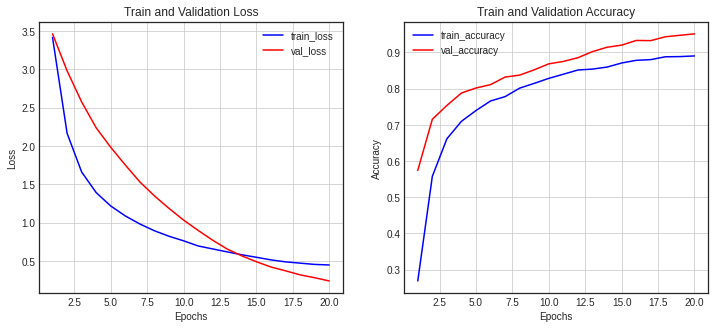

In [18]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
model.evaluate(x_test, y_test_one_hot)

71/71 [==============================] - 0s 3ms/step - loss: 0.9958 - accuracy: 0.7890


[0.9957765340805054, 0.7889581322669983]

<br>  

**loss는 0.9958, accuracy는 0.7890이 나오는 것을 확인 할 수 있다.**

<br>  

---
<br>  
<br>  
<br>  

## 🔶CIFAR10 딥러닝 모델
<br> 
<br>  

## 데이터 로드 및 전처리

- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리. 데이터셋은 `keras.datasets`에서 불러올 수 있는 CIFAR10 데이터 셋을 활용.  
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력.

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [32]:
# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [33]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

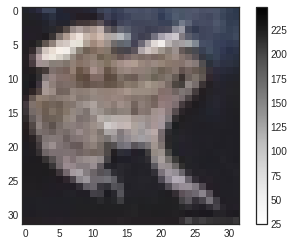

In [34]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [35]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [36]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형
x_train = x_train.reshape((x_train.shape[0], -1)) # '-1'을 사용하면 해당 차원의 크기를 자동으로 계산하여 변형
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [37]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

- *BatchNormalization*과 *Dropout*을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [38]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               786688    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)               

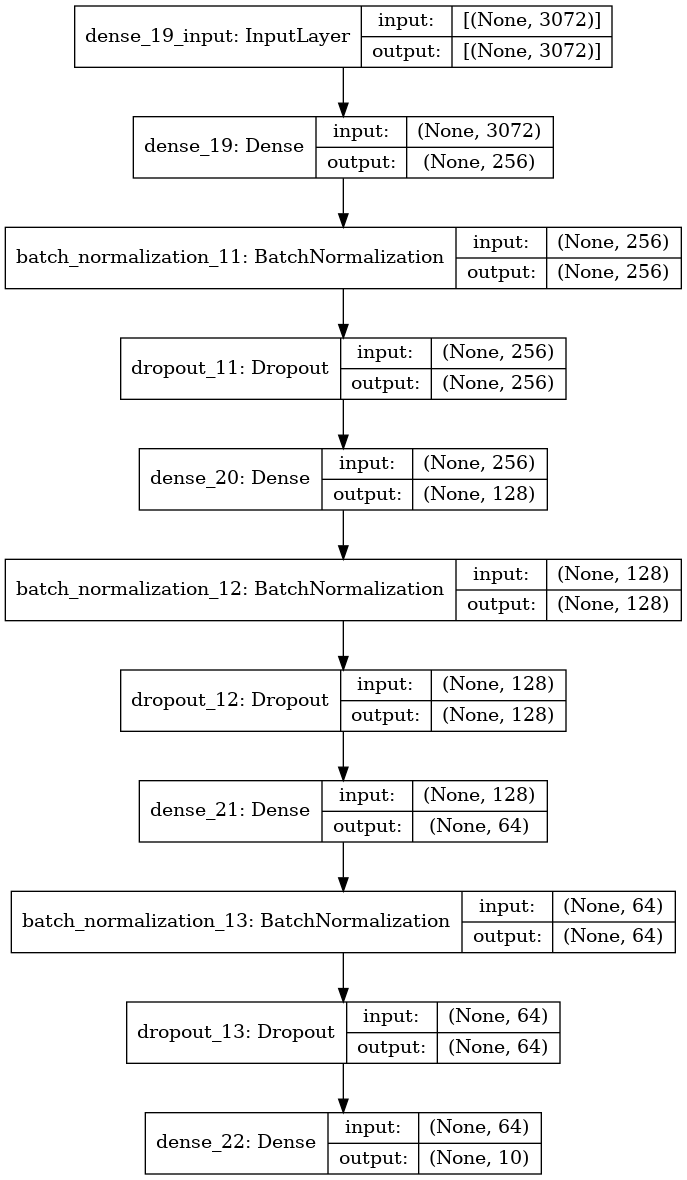

In [40]:
utils.plot_model(model, show_shapes=True)

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


## 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



y_train_binary = y_train  # 이진 분류를 위해 레이블을 다시 정의
y_val_binary = y_val
y_test_binary = y_test

# 모델 학습
history = model.fit(
    x_train, y_train_binary,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val_binary),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
625/625 [==============================] - 4s 4ms/step - loss: 2.3152 - accuracy: 0.2183 - val_loss: 1.8671 - val_accuracy: 0.3192
Epoch 2/50
625/625 [==============================] - 2s 4ms/step - loss: 1.9458 - accuracy: 0.2907 - val_loss: 1.8398 - val_accuracy: 0.3300
Epoch 3/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8945 - accuracy: 0.3129 - val_loss: 1.8628 - val_accuracy: 0.3055
Epoch 4/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8909 - accuracy: 0.3150 - val_loss: 1.8180 - val_accuracy: 0.3336
Epoch 5/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8842 - accuracy: 0.3157 - val_loss: 1.7653 - val_accuracy: 0.3656
Epoch 6/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8775 - accuracy: 0.3180 - val_loss: 1.7350 - val_accuracy: 0.3713
Epoch 7/50
625/625 [==============================] - 2s 4ms/step - loss: 1.8724 - accuracy: 0.3217 - val_loss: 1.7716 - val_accuracy: 0.3556
Epoch 

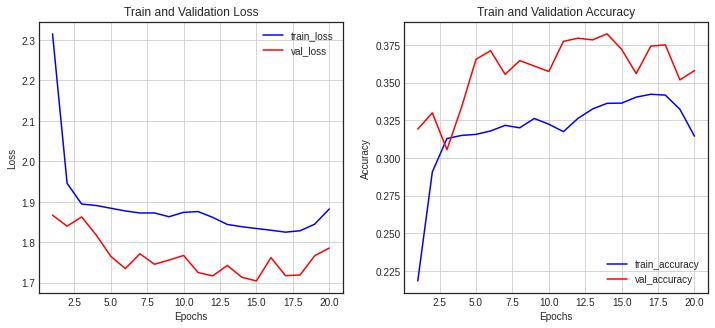

In [43]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()
plt.show()

## 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가한다.

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6943 - accuracy: 0.3771


[1.6943447589874268, 0.37709999084472656]

<br>  

**loss는 1.6943, mae는 0.3771이 나오는 것을 확인 할 수 있다.**

<br>  
<br>  
<br>  
<br>   

---

# 회고

<br>  

- Keep  
    검색하고 찾아보며 문제를 해결하려고 노력했고 모델별로 어떤 차이인지 분류 모델인지 회귀 모델인지 생각하고 시작했다.  
    
<br>

- Problem  
    바로바로 떠오르지 않아서 가이드 없이는 여전히 진행하기에 어려움이 있다. 반복되는 코드들이 있어서 앞에서 진행했던 부분을 다시 읽어보는 등 시간을 낭비한 감이 있다.  
<br>

- Try  
    검색을 많이 해보았다.